In [121]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt

import scipy.stats as scs
import statsmodels as smm
import datetime

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA

In [122]:
df=pd.read_csv('data.csv')
df['Dates']=pd.to_datetime(df['Dates'])

In [123]:
print(df.head())

       Dates  MXWO Index  UKX Index  IBOV Index  SPTSX Index  IMOEX Index  \
0 1990-06-18      515.82     2370.5         0.0       3519.9          NaN   
1 1990-06-19      515.29     2369.7         0.0       3529.1          NaN   
2 1990-06-20      516.80     2371.4         0.0       3530.5          NaN   
3 1990-06-21      516.76     2370.3         0.0       3526.3          NaN   
4 1990-06-22      513.78     2378.5         0.0       3490.8          NaN   

   MXWD Index  KOSPI Index  ASE Index  FTSEMIB Index  SPX Index  SHCOMP Index  
0      126.95       756.39    1330.87            NaN     356.88           NaN  
1      126.83       749.61    1353.08            NaN     358.47           NaN  
2      127.21       740.84    1394.14            NaN     359.10           NaN  
3      127.21       743.17    1422.44            NaN     360.47           NaN  
4      126.47       747.37    1428.78            NaN     355.43           NaN  


In [124]:
olympics=pd.read_csv('olympics.csv')
olympics['Opening']=pd.to_datetime(olympics['Opening'])
olympics['Close']=pd.to_datetime(olympics['Close'])
olympics['Announcement']=pd.to_datetime(olympics['Announcement'])

In [125]:
olympics

,Year,City,Country,Continent,Summer,Winter,Opening,Close,Announcement,Index
0,2018,Pyeongchang,South Korea,Asia,NaN,XXIII,2018-02-09,2018-02-25,2011-07-06,KOSPI Index
1,2016,Rio de Janeiro,Brazil,South America,XXXI,NaN,2016-08-05,2016-08-21,2009-10-02,IBOV Index
2,2014,Sochi,Russia,Europe,NaN,XXII,2014-02-07,2014-02-23,2007-07-04,IMOEX Index
3,2012,London,United Kingdom,Europe,XXX,NaN,2012-07-27,2012-08-12,2005-07-06,UKX Index
4,2010,Vancouver,Canada,North America,NaN,XXI,2010-02-12,2010-02-28,2003-07-02,SPTSX Index
5,2008,Beijing,China,Asia,XXIX,NaN,2008-08-08,2008-08-24,2001-07-13,SHCOMP Index
6,2006,Turin,Italy,Europe,NaN,XX,2006-02-10,2006-02-26,1999-06-19,FTSEMIB Index
7,2004,Athens,Greece,Europe,XXVIII,NaN,2004-08-13,2004-08-29,1997-05-09,ASE Index
8,2002,Salt Lake City,United States,North America,NaN,XIX,2002-02-08,2002-02-24,1995-06-16,SPX Index


In [134]:
no=len(olympics)
nd=7
open_change=[[0]*(nd+1) for _ in range(no)]

for i in range(no):
    ind=olympics['Index'][i]
    o=olympics['Opening'][i]
    benchmark='MXWD Index'
    
    try:
        k=df[df['Dates']==o].index[0] #if openning date is a trading day
    except:
        k=df[df['Dates']==o- datetime.timedelta(days=1)].index[0]  #otherwise consider the previous trading day
    k-=1
    p,p_bench=df.iloc[k][ind],df.iloc[k][benchmark]
    for j in range(1,nd+1):
        open_change[i][j]=(df.iloc[k+j][ind]-p)/p-(df.iloc[k+j][benchmark]-p_bench)/p_bench

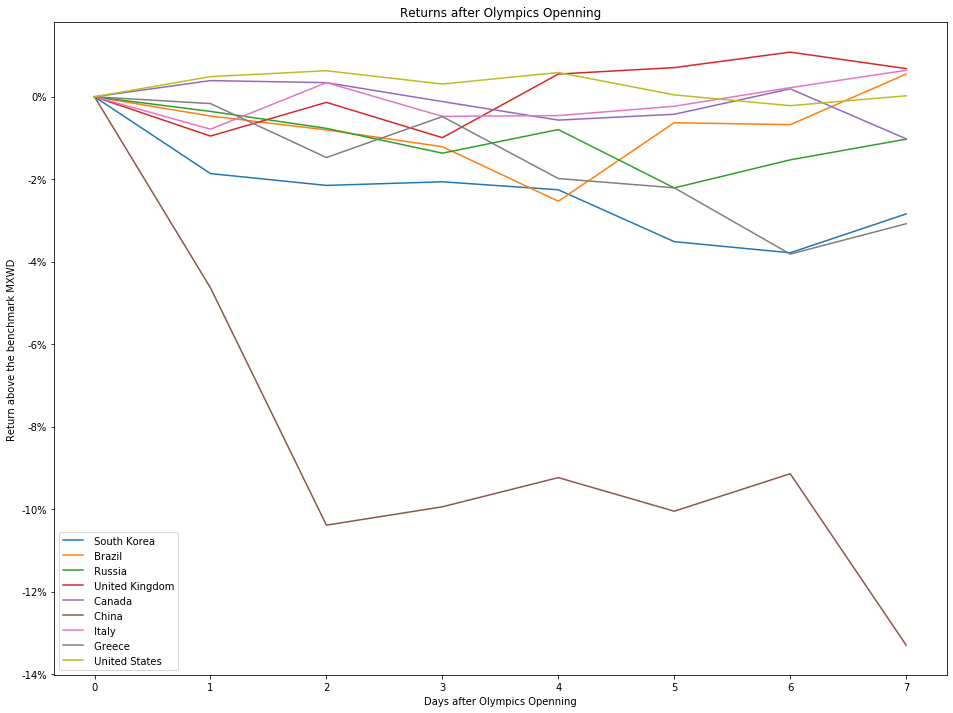

In [136]:
plt.figure(figsize=(16,12))
for i in range(len(open_change)):
    plt.plot(range(nd+1),open_change[i],label=olympics['Country'][i])
plt.xlabel('Days after Olympics Openning')
plt.ylabel('Return above the benchmark MXWD')
plt.title('Returns after Olympics Openning')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.show()

In [137]:
no=len(olympics)
nd=7
announce_change=[[0]*(nd+1) for _ in range(no)]

for i in range(no):
    #if i==5:
    #    continue
    ind=olympics['Index'][i]
    o=olympics['Announcement'][i]
    benchmark='MXWO Index'
    
    try:
        k=df[df['Dates']==o].index[0] #if openning date is a trading day
    except:
        k=df[df['Dates']==o- datetime.timedelta(days=1)].index[0]  #otherwise consider the previous trading day
    k-=1
    p,p_bench=df.iloc[k][ind],df.iloc[k][benchmark]
    for j in range(1,nd+1):
        announce_change[i][j]=(df.iloc[k+j][ind]-p)/p-(df.iloc[k+j][benchmark]-p_bench)/p_bench

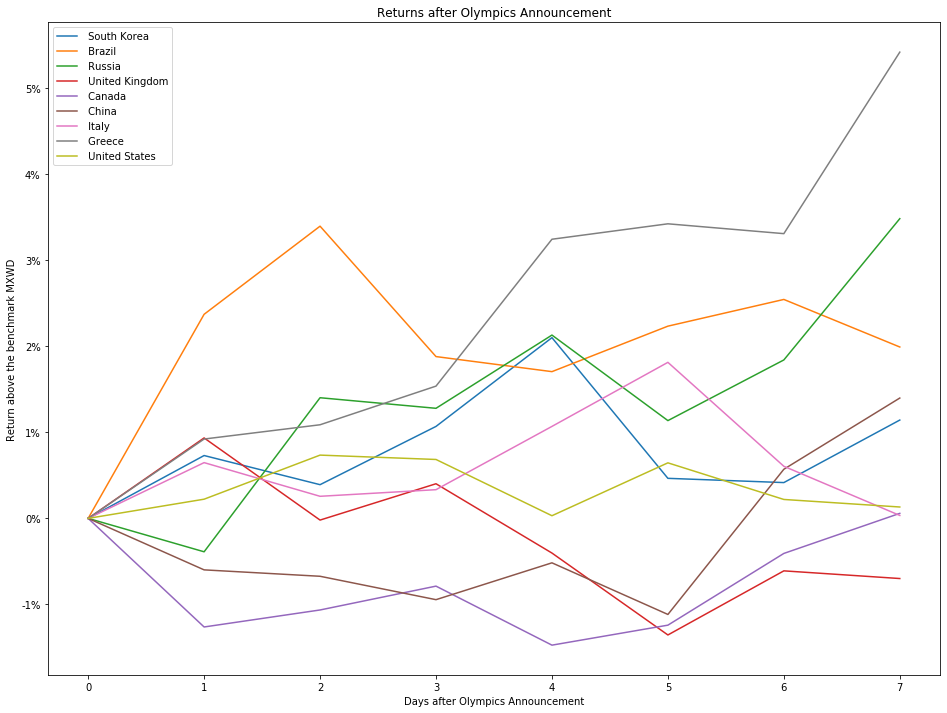

In [138]:
plt.figure(figsize=(16,12))
for i in range(len(open_change)):
    plt.plot(range(nd+1),announce_change[i],label=olympics['Country'][i])
plt.xlabel('Days after Olympics Announcement')
plt.ylabel('Return above the benchmark MXWD')
plt.title('Returns after Olympics Announcement')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.show()

**Period Analysis**

How's price change during olympics and after announcement to olympics?

In [156]:
duration_change=[[0]*2 for _ in range(no)]

duration_change_relative=[[0]*2 for _ in range(no)]
for i in range(no):
    ind=olympics['Index'][i]
    a=olympics['Announcement'][i]
    o=olympics['Opening'][i]
    e=olympics['Close'][i]
    
    ind_open=df[df['Dates']==o].index[0]
    ind_open-=1
    ind_end=df[df['Dates']==o- datetime.timedelta(days=2)].index[0]
    benchmark='MXWO Index'
    
    duration_change[i][0]=(df.iloc[ind_end][ind]-df.iloc[ind_open][ind])/df.iloc[ind_open][ind]
    
    duration_change[i][1]=(df.iloc[ind_end+10][ind]-df.iloc[ind_end][ind])/df.iloc[ind_end][ind]
    
    duration_change_relative[i][0]=(df.iloc[ind_end][ind]-df.iloc[ind_open][ind])/df.iloc[ind_open][ind]-\
    (df.iloc[ind_end][benchmark]-df.iloc[ind_open][benchmark])/df.iloc[ind_open][benchmark]
    
    duration_change_relative[i][1]=(df.iloc[ind_end+10][ind]-df.iloc[ind_end][ind])/df.iloc[ind_end][ind]-\
    (df.iloc[ind_end+10][benchmark]-df.iloc[ind_end][benchmark])/df.iloc[ind_end][benchmark]

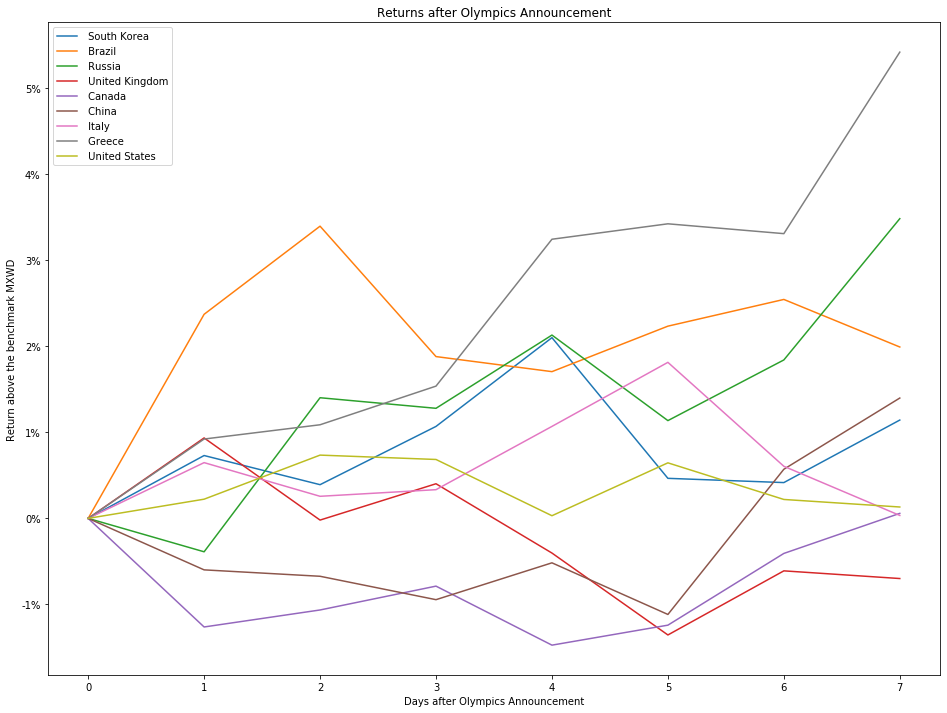

In [157]:
plt.figure(figsize=(16,12))
for i in range(len(open_change)):
    plt.plot(range(nd+1),announce_change[i],label=olympics['Country'][i])
plt.xlabel('Days after Olympics Announcement')
plt.ylabel('Return above the benchmark MXWD')
plt.title('Returns after Olympics Announcement')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.show()

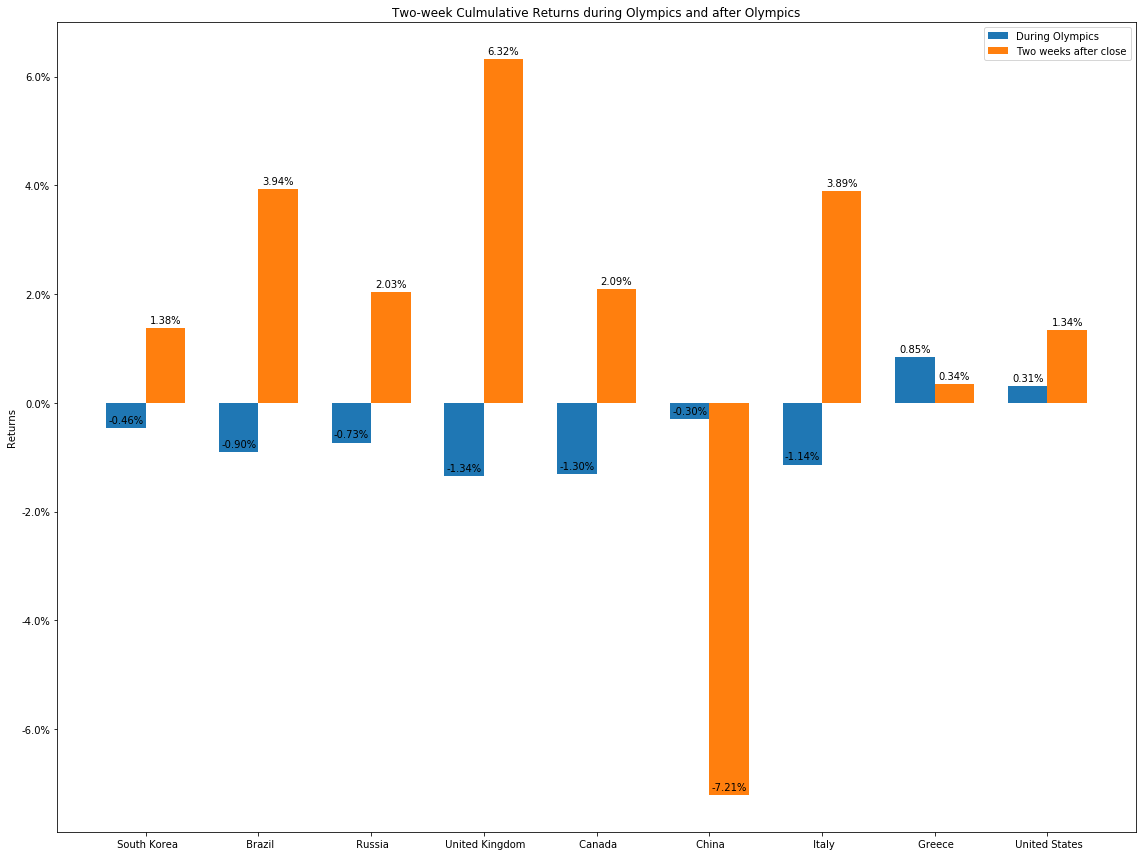

In [158]:
labels = olympics['Country']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16,12))
rects1 = ax.bar(x - width/2, [x[0] for x in duration_change], width, label='During Olympics')
rects2 = ax.bar(x + width/2, [x[1] for x in duration_change], width, label='Two weeks after close')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Returns')
ax.set_title('Two-week Culmulative Returns during Olympics and after Olympics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}%'.format(height*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.gca().set_yticklabels(['{:.1f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.show()

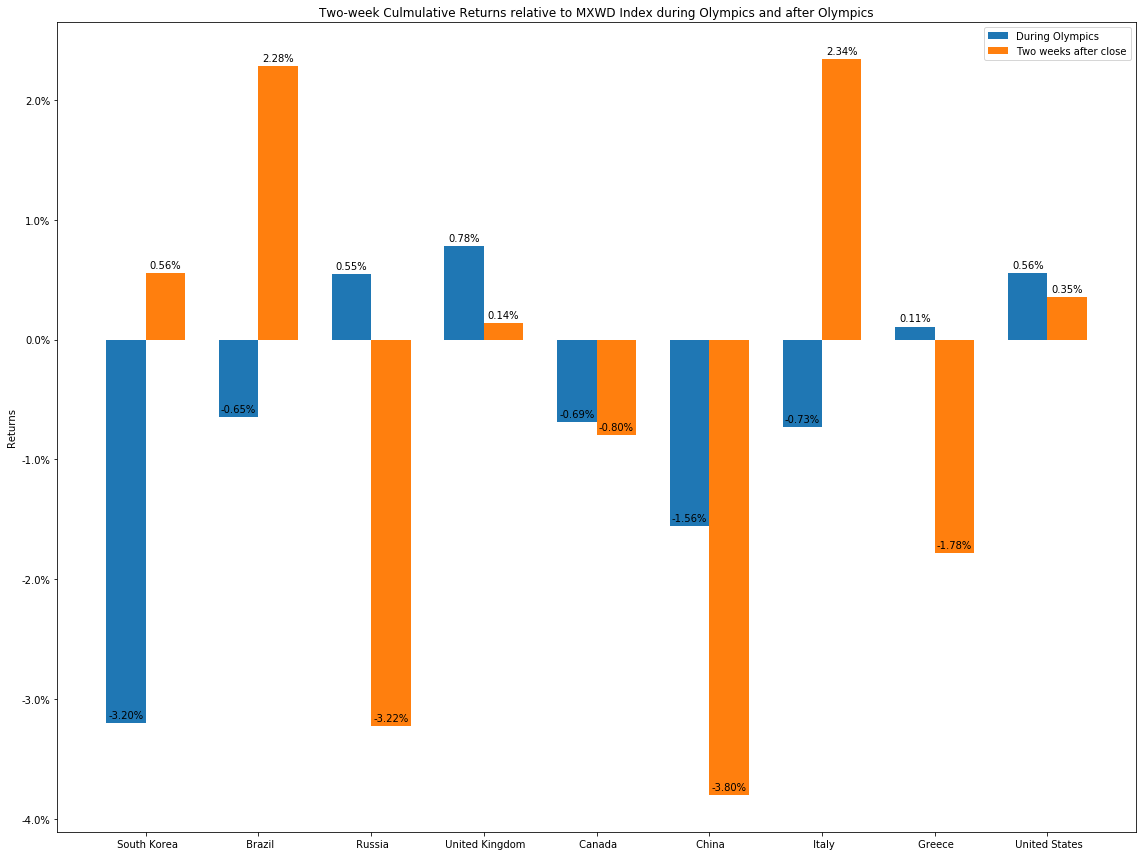

In [159]:
labels = olympics['Country']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16,12))
rects1 = ax.bar(x - width/2, [x[0] for x in duration_change_relative], width, label='During Olympics')
rects2 = ax.bar(x + width/2, [x[1] for x in duration_change_relative], width, label='Two weeks after close')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Returns')
ax.set_title('Two-week Culmulative Returns relative to MXWD Index during Olympics and after Olympics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}%'.format(height*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.gca().set_yticklabels(['{:.1f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.show()

**Macro**

In [188]:
gdp_growth=pd.read_csv('gdp_growth.csv')
gdp_growth=gdp_growth.set_index('Country Name')
country=[s.strip() for s in list(olympics.Country.values)]
country[0]='Korea, Rep.'
country[2]='Russian Federation'
t=range(1990,2020)
gdp_growth=gdp_growth.loc[country,[str(i) for i in t]]

In [189]:
gdp_growth

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
"Korea, Rep.",9.877553,10.778056,6.198643,6.877474,9.268666,9.614565,7.890703,6.170552,-5.129448,11.466942,...,6.804825,3.685668,2.402531,3.164709,3.202454,2.809103,2.946882,3.159636,2.664930,2.033151
Brazil,-3.102356,1.511937,-0.466913,4.665169,5.334552,4.416731,2.207536,3.394846,0.338098,0.467938,...,7.528226,3.974425,1.921150,3.004846,0.503956,-3.545763,-3.275917,1.322869,1.317224,1.136586
Russian Federation,-2.999996,-5.046939,-14.531074,-8.668540,-12.569756,-4.143528,-3.755069,1.399916,-5.299962,6.399915,...,4.500000,4.300029,4.024086,1.755422,0.736267,-1.972719,0.193690,1.825790,2.536331,1.341875
United Kingdom,0.733755,-1.103122,0.401082,2.489831,3.846009,2.531670,2.491533,3.854830,3.644853,3.428223,...,1.949521,1.540147,1.478924,2.139486,2.607476,2.355524,1.918155,1.892077,1.340721,1.408642
Canada,0.164673,-2.086085,0.900260,2.660857,4.494466,2.693976,1.619172,4.280040,2.796542,3.970483,...,3.089495,3.146881,1.762223,2.329123,2.870036,0.659177,1.001394,3.170730,2.013639,1.656041
China,3.907114,9.294076,14.216164,13.867576,13.052159,10.949227,9.928372,9.230769,7.837614,7.667486,...,10.636140,9.550914,7.859627,7.768615,7.424524,7.041856,6.848728,6.946200,6.751614,6.108561
Italy,1.985775,1.538448,0.834275,-0.852806,2.151024,2.886837,1.266785,1.830212,1.810615,1.625728,...,1.713296,0.707333,-2.980906,-1.841065,-0.004548,0.778304,1.293463,1.667859,0.798119,0.301256
Greece,0.000000,3.100000,0.700000,-1.600000,2.000000,2.099720,2.862129,4.484199,3.894905,3.072597,...,-5.479037,-9.132494,-7.300494,-3.241425,0.739777,-0.437834,-0.190952,1.505099,1.934371,1.870870
United States,1.885960,-0.108259,3.522442,2.752844,4.028839,2.684287,3.772501,4.447216,4.481408,4.753236,...,2.563767,1.550836,2.249546,1.842081,2.451973,2.880910,1.567215,2.217010,3.183895,2.333577


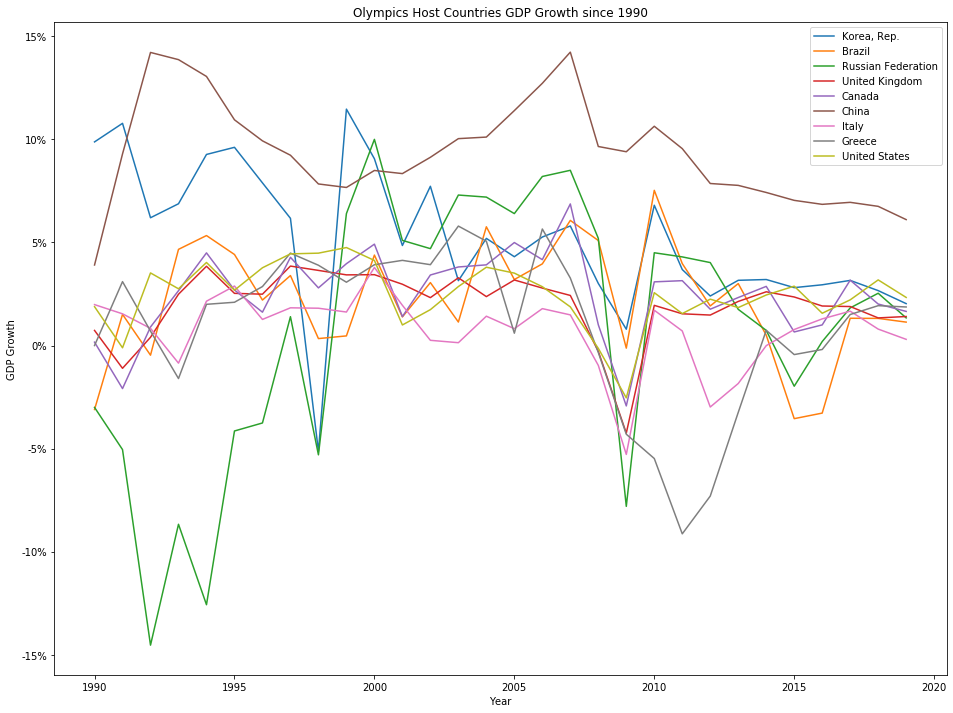

In [195]:
plt.figure(figsize=(16,12))
for i in range(len(gdp_growth)):
    plt.plot(t,gdp_growth.iloc[i,:],label=gdp_growth.index[i])
plt.xlabel('Year')
plt.ylabel('GDP Growth')
plt.title('Olympics Host Countries GDP Growth since 1990')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.show()

No handles with labels found to put in legend.


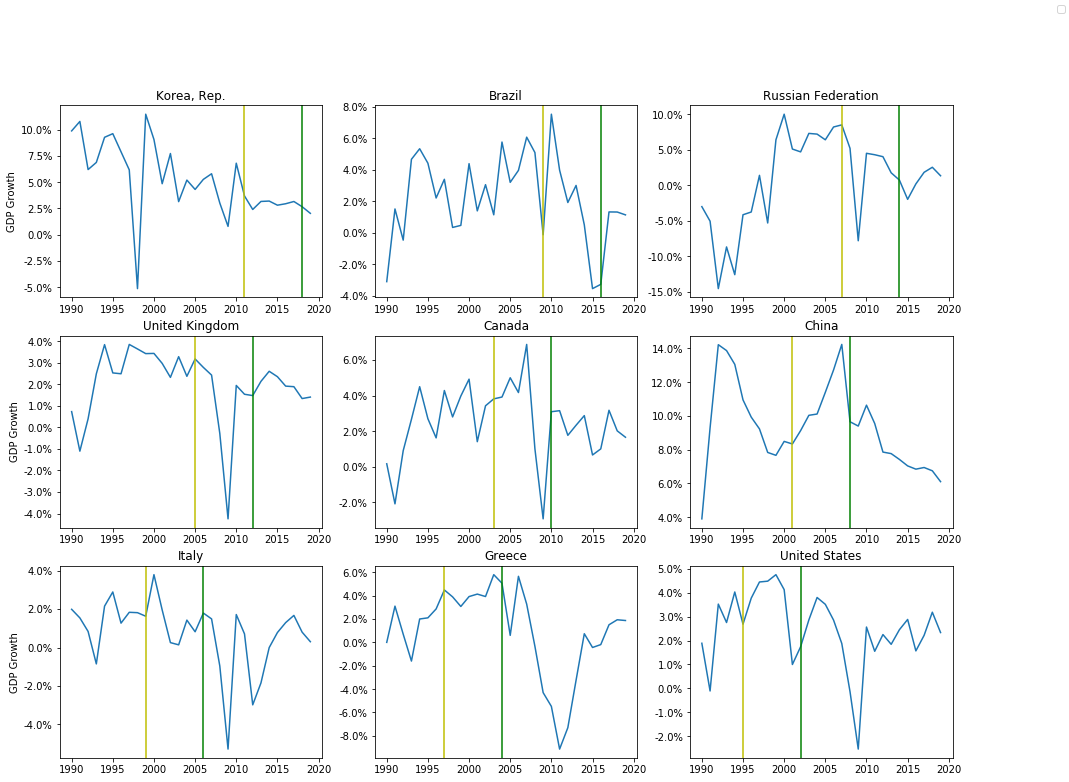

In [219]:
fig, axes = plt.subplots(3, 3,figsize=(16,12))
for i in range(len(gdp_growth)):
    axes[i//3, i%3].plot(t, gdp_growth.iloc[i,:])
    axes[i//3, i%3].axvline(x=olympics.Announcement[i].year,color='y')
    axes[i//3, i%3].axvline(x=olympics.Opening[i].year,color='g')
    
    axes[i//3, i%3].set_title(gdp_growth.index[i])
    axes[i//3, i%3].set_yticklabels(['{:.1f}%'.format(x) for x in axes[i//3, i%3].get_yticks()]) 
    if i%3==0:
        axes[i//3, i%3].set_ylabel('GDP Growth')
fig.legend()
plt.show()